In [1]:
import pdspy.modeling as modeling
import pdspy.dust as dust
import numpy
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.pyplot as plt
import glob

In [2]:
# starting values

T_star = 4000.     #0
logL_star = 1.     #1
logM_disk = -5.    #2
logR_disk = 1.5    #3
h_0 = 0.2          #4
logR_in = 1.       #5
gamma = 1.         #6
beta = 1.2         #7
logM_env = -5.     #8
logR_env = 3.2     #9
f_cav = 0.5        #10
ksi = 1.           #11
loga_max = 3.      #12
p = 3.5            #13
incl = 45.         #14

In [3]:
params = [T_star,logL_star,logM_disk,logR_disk,h_0,logR_in,\
          gamma,beta,logM_env,logR_env,f_cav,ksi,loga_max,p,incl]
param_names = ["T_star","logL_star","logM_disk","logR_disk","h_0","logR_in",\
          "gamma","beta","logM_env","logR_env","f_cav","ksi","loga_max","p","incl"]
ranges = [[3000.,5000.], [-1,3.],[-8.,-2.], [0.,3.],[0.01,0.5],[-1.,2.5],[0.0,2.0],\
        [0.5,2.0],[-8.,-2.],[2.5,4.], [0.,1.], [0.5,1.5],[0.,5.],[2.5,4.5],[0.,90.]]
base = [4000., 1., -5., 1.5, 0.2, 1., 1., 1.2, -5., 3.2, 0.5, 1., 3., 3.5, 45.]

In [4]:
filenames=[]
for i in range(len(param_names)):
    sub=[]
    for j in range(7):
        sub.append(param_names[i]+"_"+str(j)+'.hdf5')
    filenames.append(sub)

In [5]:
def temp_density(i):
    num=3
    steps=numpy.linspace(ranges[i][0],ranges[i][1],num)

    pdf = PdfPages("../visualization/tempdensity/"+param_names[i]+"_tempdensity_"+str(len(steps))+"_1.pdf")
    fig, ax = plt.subplots(nrows=3, ncols=2)
    
    densmax=-100
    densmin=-50
    tempmax=-500
    tempmin=200
    
    for m in range(len(steps)):
        model = modeling.YSOModel()
        model.read_yso("./hdf5/"+filenames[i][m])
        temperature = model.grid.temperature[1][:,:,0]
        disk_density = model.grid.density[0][:,:,0]
        envelope_density = model.grid.density[1][:,:,0]        
        if numpy.min(temperature)<tempmin:
            tempmin=numpy.min(temperature)
        if numpy.max(temperature)>tempmax:
            tempmax=numpy.max(temperature)
        if numpy.max(numpy.log10(disk_density))>densmax:
            densmax=numpy.max(numpy.log10(disk_density))    
    
    for m in range(len(steps)):
        model = modeling.YSOModel()
        model.read_yso("./hdf5/"+filenames[i][m])
        
        # Get the temperature structure.
        r = model.grid.r
        theta = model.grid.theta
        rr, tt = numpy.meshgrid(r, theta, indexing='ij')
        R = rr * numpy.sin(tt)
        z = rr * numpy.cos(tt)
        
        temperature = model.grid.temperature[1][:,:,0]
        disk_density = model.grid.density[0][:,:,0]
        envelope_density = model.grid.density[1][:,:,0]        

        # Plot the temperature.
        templevels=numpy.linspace(tempmin,tempmax,100)
        tempimg=ax[m][0].contourf(R, z, temperature, templevels)
        fig.colorbar(tempimg, ax=ax[m,0])
        fig.set_size_inches((12,12))

        # May want to plot the log of the density because it can vary over a few orders of magnitude
        denslevels=numpy.linspace(densmin, densmax, 100)
        densimg=ax[m][1].contourf(R, z, numpy.log10(disk_density), denslevels)
        fig.colorbar(densimg, ax=ax[m,1])
        fig.set_size_inches((12,12))
        
        # Adjust the figure.
        ax[m][0].set_xlim(0,100)
        ax[m][0].set_ylim(0,100)
        ax[m][1].set_xlim(0,100)
        ax[m][1].set_ylim(0,100)
        
        ax[m][0].set_title("Temperature,"+ param_names[i]+"="+str(steps[m]))
        ax[m][1].set_title("log(Density),"+ param_names[i]+"="+str(steps[m]))
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
    # Now save the figure.
    pdf.savefig(fig)
    plt.clf()

    # Close the pdf.
    pdf.close()
    print("temperature and density plots generated for", param_names[i])

In [ ]:
for i in range(len(params)):
    temp_density(i)

In [5]:
filenames10=[]
for i in range(len(param_names)):
    sub=[]
    for j in range(7):
        sub.append(param_names[i]+"_"+str(j)+'_10.hdf5')
    filenames10.append(sub)

In [8]:
def temp_density10(i):
    num=3
    steps=numpy.linspace(ranges[i][0],ranges[i][1],num)

    pdf = PdfPages("../visualization/tempdensity/"+param_names[i]+"_tempdensity_"+str(len(steps))+"_10.pdf")
    fig, ax = plt.subplots(nrows=3, ncols=2)
    
    densmax=-100
    densmin=-50
    tempmax=-500
    tempmin=200
    
    for m in range(len(steps)):
        model = modeling.YSOModel()
        model.read_yso("./hdf5/"+filenames10[i][m])
        temperature = model.grid.temperature[1][:,:,0]
        disk_density = model.grid.density[0][:,:,0]
        envelope_density = model.grid.density[1][:,:,0]        
        if numpy.min(temperature)<tempmin:
            tempmin=numpy.min(temperature)
        if numpy.max(temperature)>tempmax:
            tempmax=numpy.max(temperature)
        if numpy.max(numpy.log10(disk_density))>densmax:
            densmax=numpy.max(numpy.log10(disk_density))    
    
    for m in range(len(steps)):
        model = modeling.YSOModel()
        model.read_yso("./hdf5/"+filenames10[i][m])
        
        # Get the temperature structure.
        r = model.grid.r
        theta = model.grid.theta
        rr, tt = numpy.meshgrid(r, theta, indexing='ij')
        R = rr * numpy.sin(tt)
        z = rr * numpy.cos(tt)
        
        temperature = model.grid.temperature[1][:,:,0]
        disk_density = model.grid.density[0][:,:,0]
        envelope_density = model.grid.density[1][:,:,0]        

        # Plot the temperature.
        templevels=numpy.linspace(tempmin,tempmax,100)
        tempimg=ax[m][0].contourf(R, z, temperature, templevels)
        fig.colorbar(tempimg, ax=ax[m,0])
        fig.set_size_inches((12,12))

        # May want to plot the log of the density because it can vary over a few orders of magnitude
        denslevels=numpy.linspace(densmin, densmax, 100)
        densimg=ax[m][1].contourf(R, z, numpy.log10(disk_density), denslevels)
        fig.colorbar(densimg, ax=ax[m,1])
        fig.set_size_inches((12,12))
        
        # Adjust the figure.
        ax[m][0].set_xlim(0,100)
        ax[m][0].set_ylim(0,100)
        #ax[m][1].set_xlim(0,100)
        #ax[m][1].set_ylim(0,100)
        
        ax[m][0].set_title("Temperature,"+ param_names[i]+"="+str(steps[m]))
        ax[m][1].set_title("log(Density),"+ param_names[i]+"="+str(steps[m]))
    
    plt.subplots_adjust(hspace=0.4)
    plt.show()
    
    # Now save the figure.
    pdf.savefig(fig)
    plt.clf()

    # Close the pdf.
    pdf.close()
    print("temperature and density plots generated for", param_names[i])

/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10


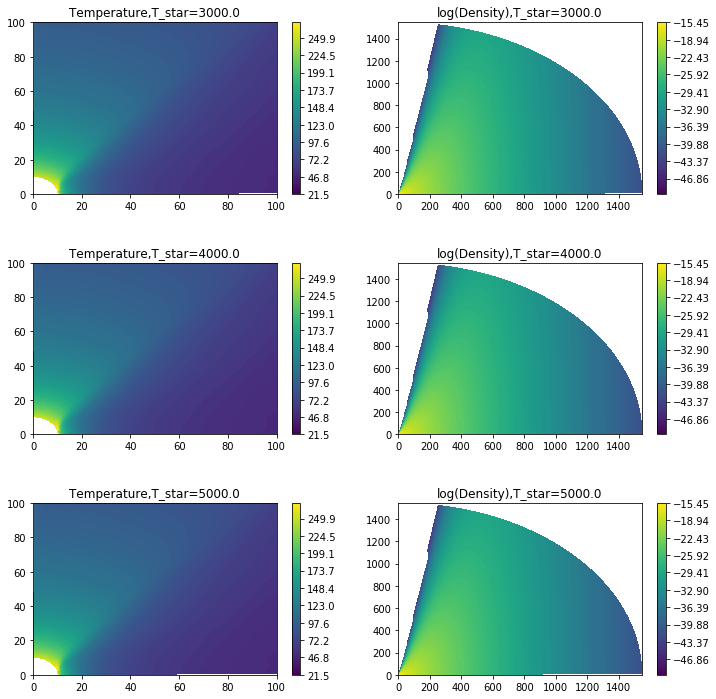

temperature and density plots generated for T_star


<Figure size 432x288 with 0 Axes>

In [9]:
temp_density10(0)

/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log10
/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log10
/users/eteng/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:49: RuntimeWarning: divide by zero encountered in log10


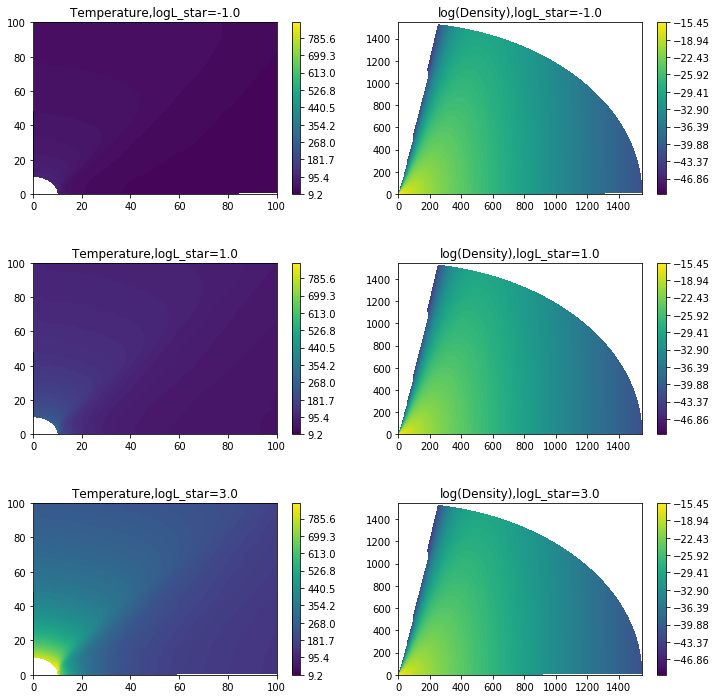

temperature and density plots generated for logL_star


<Figure size 432x288 with 0 Axes>

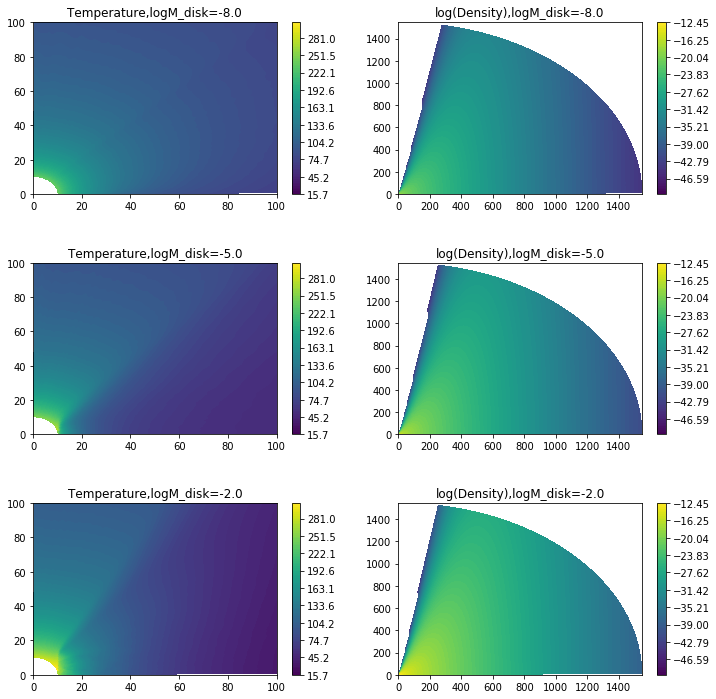

temperature and density plots generated for logM_disk


<Figure size 432x288 with 0 Axes>

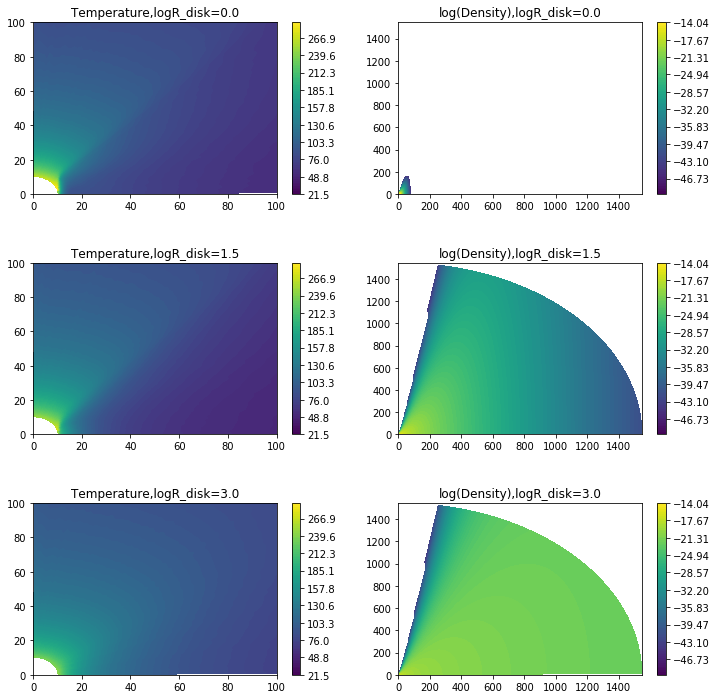

temperature and density plots generated for logR_disk


<Figure size 432x288 with 0 Axes>

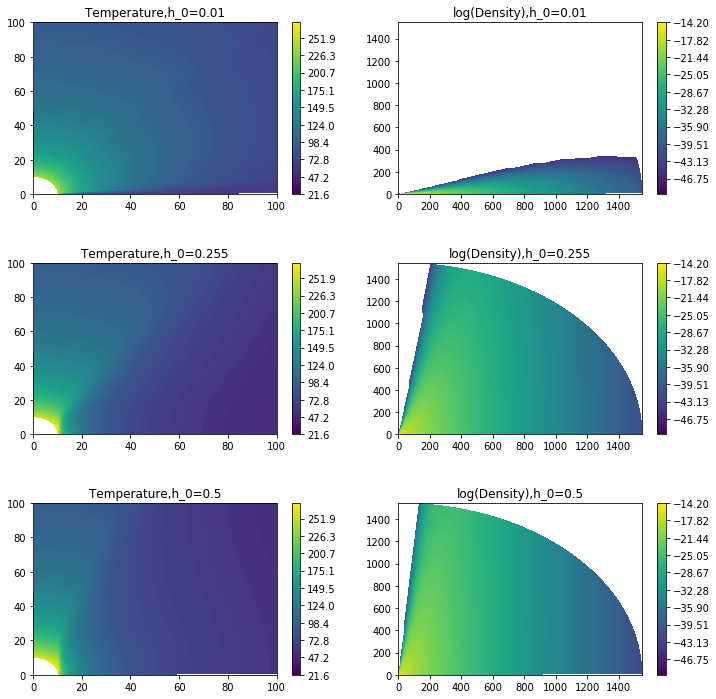

temperature and density plots generated for h_0


<Figure size 432x288 with 0 Axes>

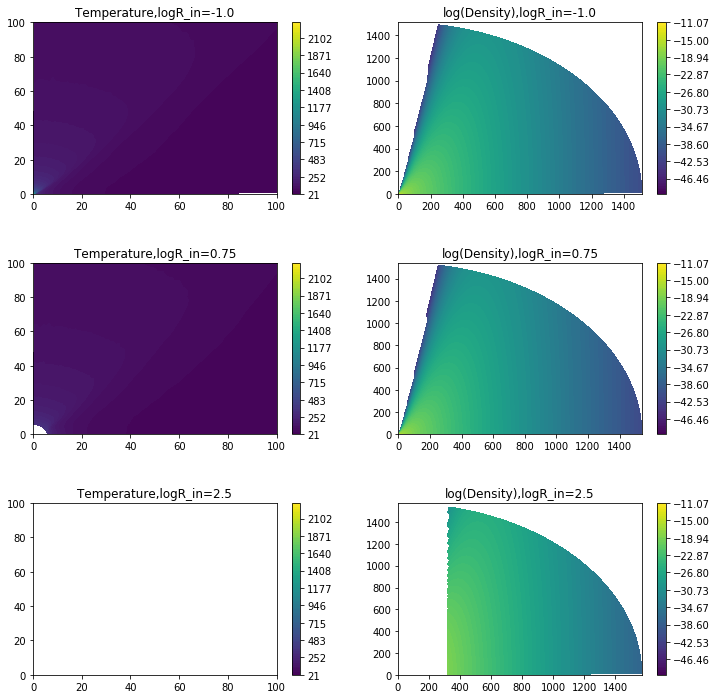

temperature and density plots generated for logR_in


<Figure size 432x288 with 0 Axes>

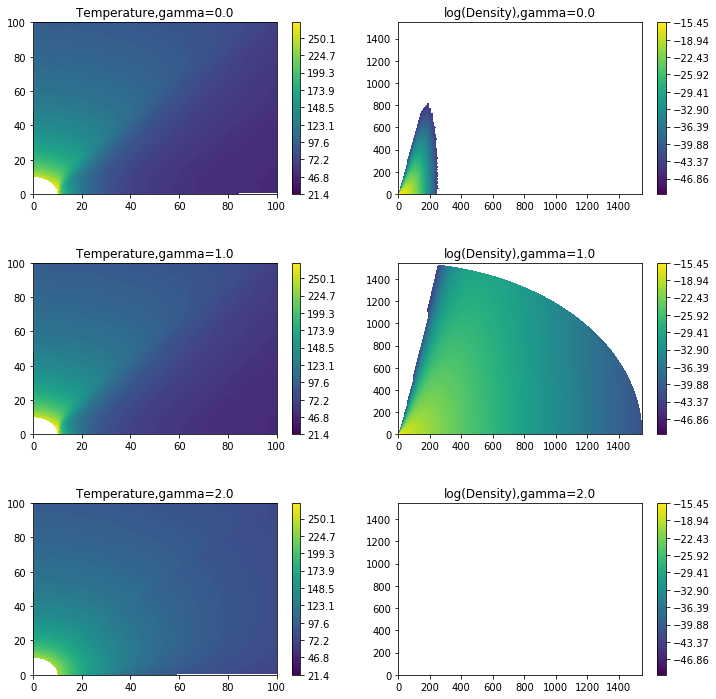

temperature and density plots generated for gamma


<Figure size 432x288 with 0 Axes>

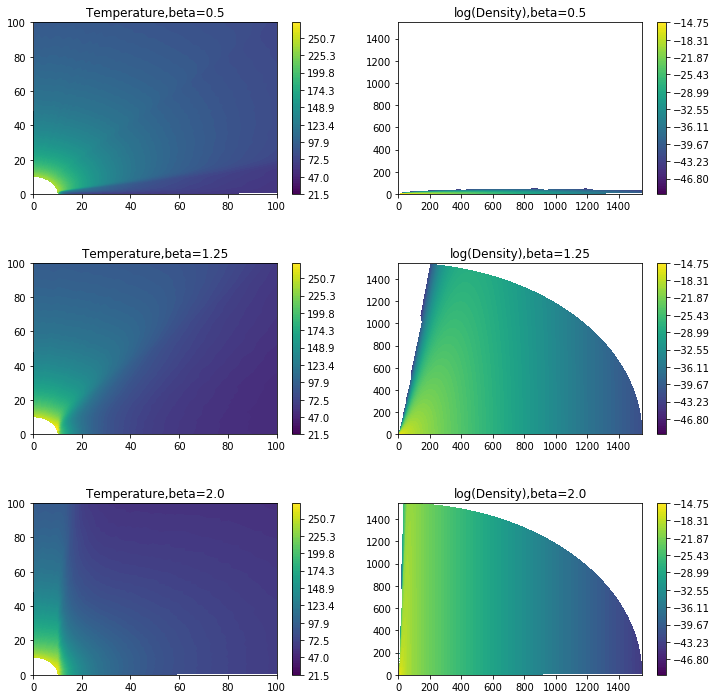

temperature and density plots generated for beta


<Figure size 432x288 with 0 Axes>

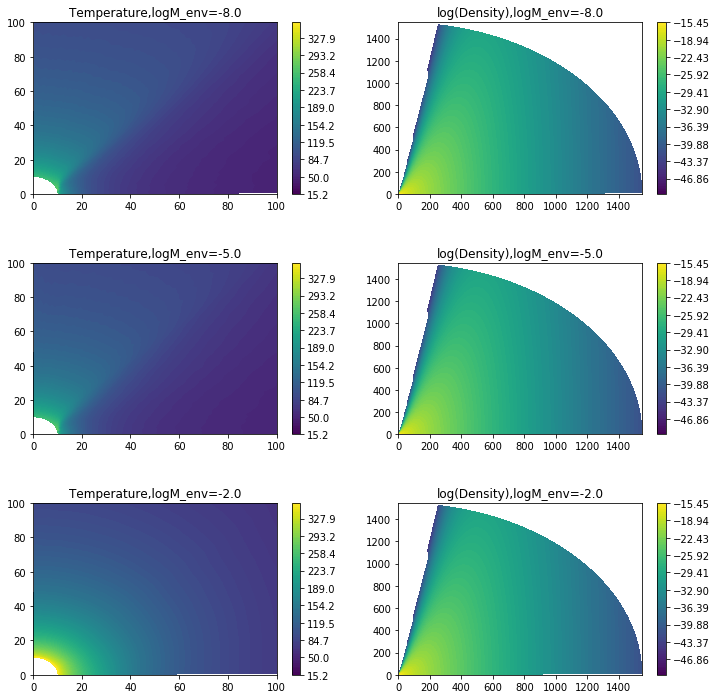

temperature and density plots generated for logM_env


<Figure size 432x288 with 0 Axes>

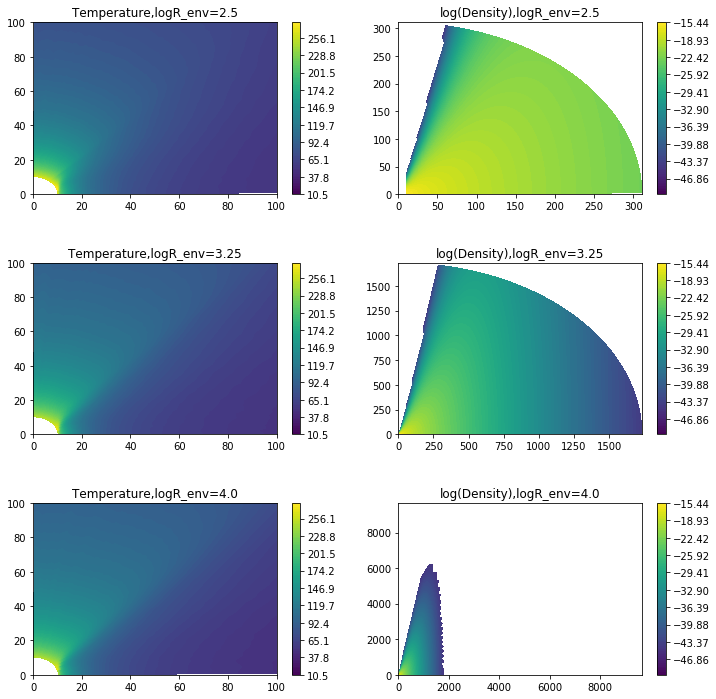

temperature and density plots generated for logR_env


<Figure size 432x288 with 0 Axes>

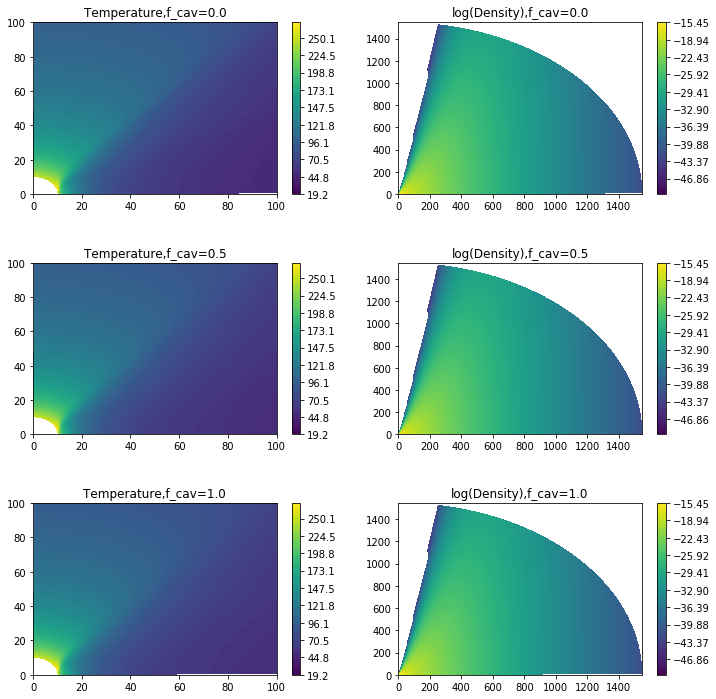

temperature and density plots generated for f_cav


<Figure size 432x288 with 0 Axes>

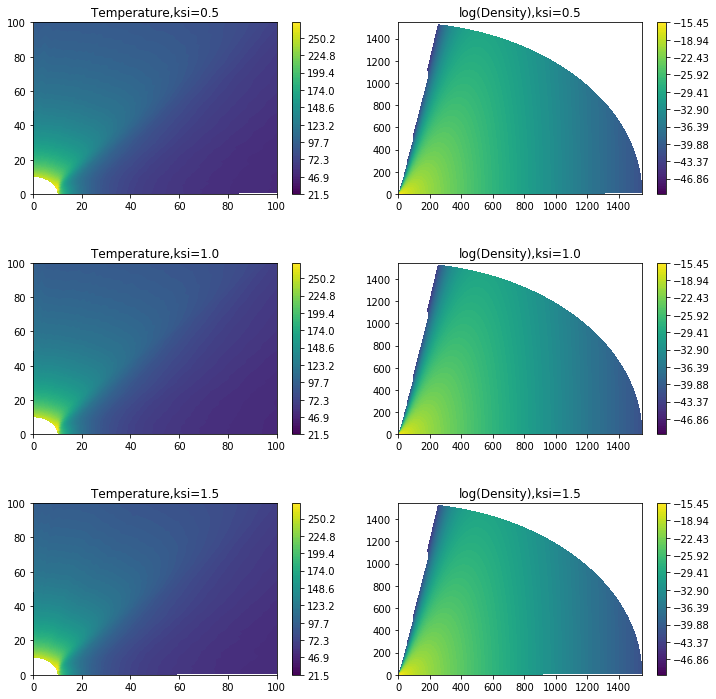

temperature and density plots generated for ksi


<Figure size 432x288 with 0 Axes>

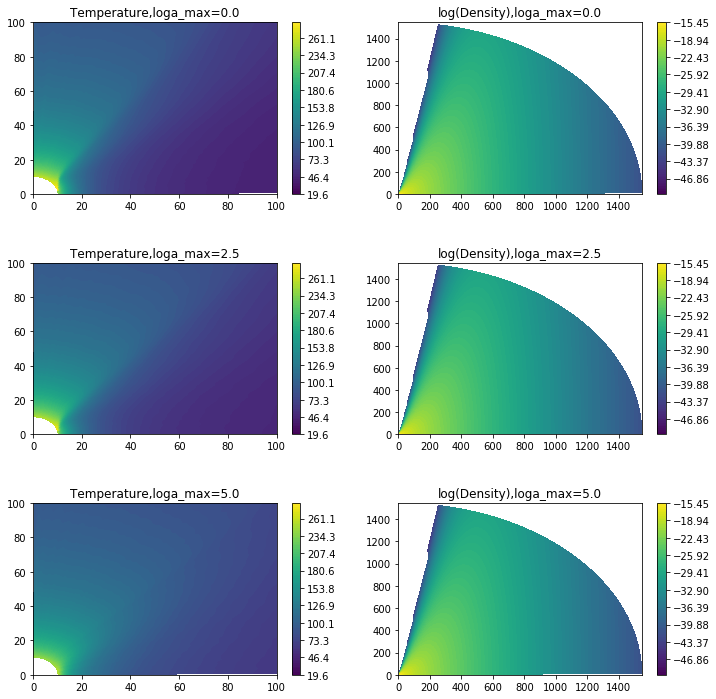

temperature and density plots generated for loga_max


<Figure size 432x288 with 0 Axes>

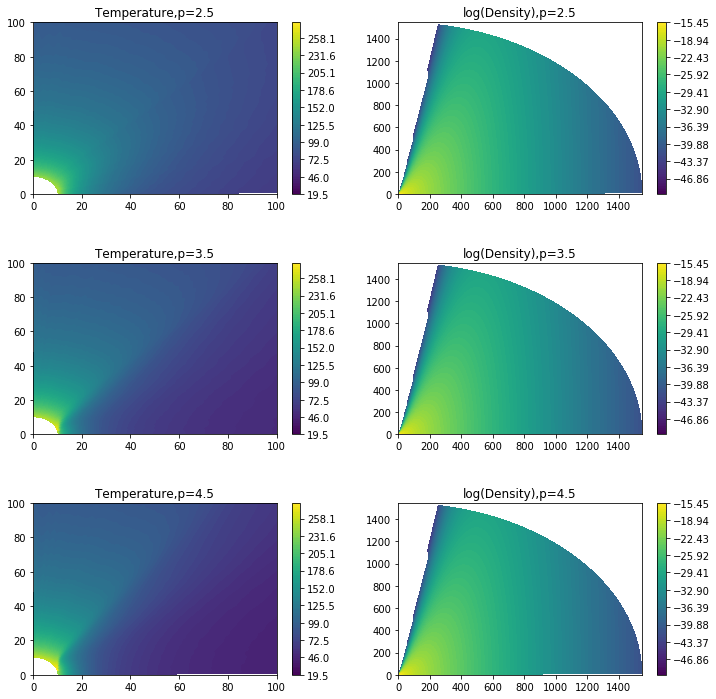

temperature and density plots generated for p


<Figure size 432x288 with 0 Axes>

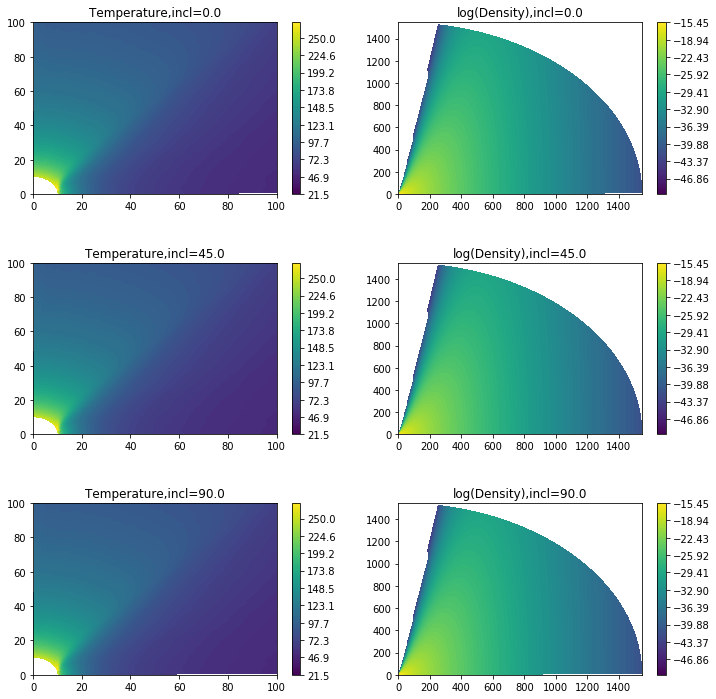

temperature and density plots generated for incl


<Figure size 432x288 with 0 Axes>

In [11]:
for i in range(len(params)-1):
    temp_density10(i+1)